## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): _(Никифоров Михаил)_

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return np.int(np.sum(marks * weights))

In [3]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
marks * weights

array([2.1 , 4.2 , 1.12, 0.84])

In [4]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [5]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [6]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [7]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [8]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [9]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    return np.array(np.where(np.abs(array1 - array2) <= precision))[0]

In [10]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [11]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [12]:
def block_matrix(block: np.array) -> np.array:
    return np.concatenate((np.concatenate((block, block), axis = 1), np.concatenate((block, block), axis = 1)), axis = 0)

In [13]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [14]:
def diag_prod(matrix: np.array) -> int:
    return np.prod(np.diagonal(matrix)[np.diagonal(matrix) != 0])

In [15]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [16]:
def normalize(matrix: np.array) -> np.array:
    stds = np.std(matrix, axis = 0)
    stds[stds == 0] = 1
    return (matrix - np.mean(matrix, axis = 0))/stds

In [17]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [18]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [19]:
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(np.poly1d(coefs)).coef

In [20]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [21]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [22]:
def make_symmetric(matrix: np.array) -> np.array:
    return (matrix + matrix.transpose())/(np.ones(matrix.shape) + np.mat(np.eye(matrix.shape[0])))

In [23]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [24]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [25]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.repeat([np.arange(a,b+1)], repeats=m, axis = 0)

In [26]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [27]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [28]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.sum(vec1 * vec2)/np.sqrt(np.sum(vec1 * vec1) * np.sum(vec2 * vec2))

In [29]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [30]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [32]:
data = pd.read_csv('titanic_train.csv')

In [33]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

1) Задача классификации - предсказать, выживет ли пассажир или нет
2) Задача регрессии - сложно сказать, но можно притянуть за уши задачу о предсказании возраста пассажира
3) Задача кластеризации - можно попробовать кластеризовать по финансовому благополуичю, можно посмотреть на каюты и палубы и кластеризовать по месту нахождения пассажира до катастрофы, но в целом это тоже немного притянуто за уши.

Сами данные нацелены на решение задачи классификации, так что другие примеры было придумать не совсем просто.

In [35]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId - порядковый
Survived - целевая переменная, категориальная переменная
Pclass - категориальный (мы не считаем, что класс 3 больше класса 1)
Name - другое (текстовые данные)
Sex - категориальный
Age - вещественный
SibSp - порядковый
Parch - порядковый
Ticket - другое (текстовые данные)
Fare - вещественный
Cabin - другое (текстовые данные)
Embarked - категориальный

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [36]:
print('Доля выживших : '+str(data['Survived'].mean()))

Доля выживших : 0.3838383838383838


In [37]:
print('Доля выживших мужчин : '+str(data[['Survived', 'Sex']].loc[data['Sex'] == 'male']['Survived'].mean()))

Доля выживших мужчин : 0.18890814558058924


In [38]:
print('Доля выживших женщин : ' + str(data[['Survived', 'Sex']].loc[data['Sex'] == 'female']['Survived'].mean()))

Доля выживших женщин : 0.7420382165605095


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [39]:
print('Людей в первом классе : ' + str(data[['Survived', 'Sex', 'Pclass']].loc[data['Pclass'] == 1].shape[0]))

Людей в первом классе : 216


In [40]:
print('Людей во втором классе : ' + str(data[['Survived', 'Sex', 'Pclass']].loc[data['Pclass'] == 2].shape[0]))

Людей во втором классе : 184


In [41]:
print('Людей в третьем классе : ' + str(data[['Survived', 'Sex', 'Pclass']].loc[data['Pclass'] == 3].shape[0]))

Людей в третьем классе : 491


In [42]:
data[['Survived', 'Sex', 'Pclass']].loc[data['Pclass'] == 3].loc[ data['Sex'] == 'male'].shape[0]

347

In [43]:
data[['Survived', 'Sex', 'Pclass']].loc[data['Pclass'] == 3].loc[ data['Sex'] == 'female'].shape[0]# ну можно и 491 - 347

144

Мужчин больше чем женщин

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [44]:
print("Минимум отдано за билет : "+str(min(data['Fare'])))
print("Максимум отдано за билет : "+str(max(data['Fare'])))
print("Средняя цена за билет : "+str(data['Fare'].mean()))

Минимум отдано за билет : 0.0
Максимум отдано за билет : 512.3292
Средняя цена за билет : 32.2042079685746


In [45]:
print('Информация о цене билета для тех, кто сел в Саутгемптоне')
print("Минимум отдано за билет : "+str(min(data[['Fare', 'Embarked']].loc[data['Embarked'] == 'S']['Fare'])))
print("Максимум отдано за билет : "+str(max(data[['Fare', 'Embarked']].loc[data['Embarked'] == 'S']['Fare'])))
print("Средняя цена за билет : "+str(data[['Fare', 'Embarked']].loc[data['Embarked'] == 'S']['Fare'].mean()))

Информация о цене билета для тех, кто сел в Саутгемптоне
Минимум отдано за билет : 0.0
Максимум отдано за билет : 263.0
Средняя цена за билет : 27.07981180124218


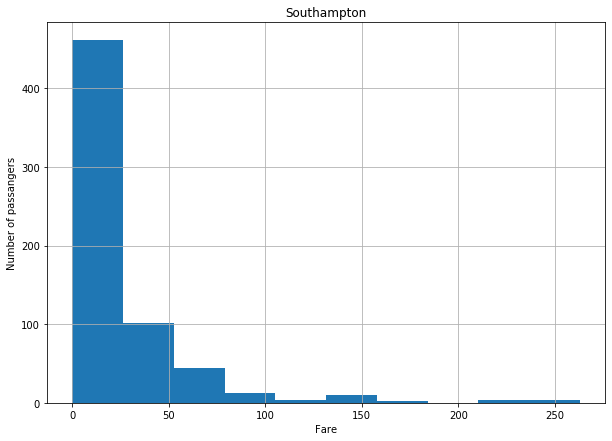

In [46]:
plt.figure(figsize=(10,7))
plt.title('Southampton')
data[['Fare', 'Embarked']].loc[data['Embarked'] == 'S']['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('Number of passangers')
plt.show()

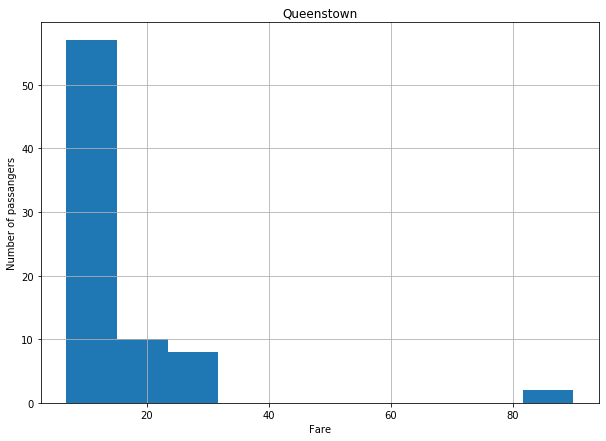

In [47]:
plt.figure(figsize=(10,7))
plt.title('Queenstown')
data[['Fare', 'Embarked']].loc[data['Embarked'] == 'Q']['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('Number of passangers')
plt.show()

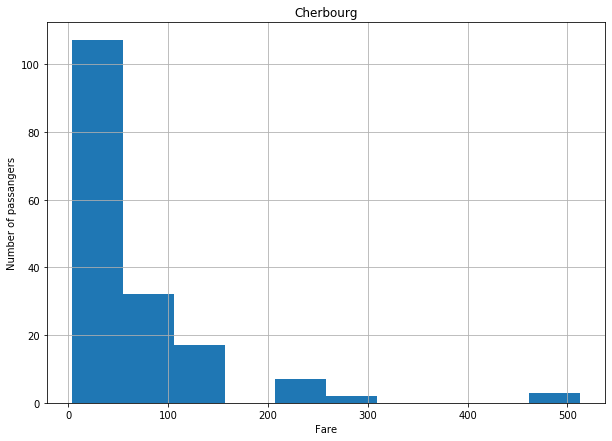

In [48]:
plt.figure(figsize=(10,7))
plt.title('Cherbourg')
data[['Fare', 'Embarked']].loc[data['Embarked'] == 'C']['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('Number of passangers')
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Формулировка слишком строгая, так как быть уверенным, что какой-то столбец не несет информации, можно проверить, например, с помощью коэффициента корреляции, но такой вопрос (про корреляцию) идут далее, потому в данном задании выскажу основные мысли о бесполезных признаках

Очевидно, что нам не важен порядок элементов в выборке (если не говорить о разбиении train-test), потому признак PassangerID бесполезен.

Вполне резонно предположить, что имя пассажира не влияет на его выживаемость, так как у нас уже есть признаки, которые характеризуют его положение в обществе.

Номер билета мы так же можем исключить, так как информацию о расположении пассажира мы можем узнать из других признаков

Вышеуказанные признаки точно (ну почти, мало ли) не помогут нам при обучении модели, поэтому удалим их из нашей выборки

In [49]:
delete_columns = ['PassengerId', 'Name','Ticket']

In [50]:
data = data.drop(delete_columns, axis = 'columns')
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [51]:
data.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [52]:
print(data['Age'].loc[data['Age'].isna() == True].shape[0])
print(data['Age'].shape[0])

177
891


In [53]:
print(data['Cabin'].loc[data['Cabin'].isna() == True].shape[0])
print(data['Cabin'].shape[0])

687
891


In [54]:
print(data['Embarked'].loc[data['Embarked'].isna() == True].shape[0])
print(data['Embarked'].shape[0])

2
891


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

Приведу три варианта работы с пропусками:

Рассмотрим признак 'Age'. Заменим пропуски средним возрастом пассажира на корабле

In [55]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'].isna().any()

False

Рассмотрим признак 'Cabin'. Можно заметить, что первая буква билета говорит о том, на какой палубе был пассажир, и эта информация может помочь в предсказании, но пока что опустим это. Признак имеет больше трех четвертей пропусков. Думаю, не так много потеряем информации, если этот признак уберем из рассмотрения.

In [56]:
data = data.drop(['Cabin'], axis = 'columns')

In [57]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


Есть только два пассажира, у которых пропуск в графке 'Embarked'. Два объекта особо погоды не сделают, так что можем их не рассмотривать

In [58]:
data.shape

(891, 8)

In [59]:
data = data.dropna()
print(data.shape[0])
data.isna().any().any()

889


False

Пропусков больше нет

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [60]:
np.corrcoef(data['Age'], data['Fare'])[0,1]

0.08860447322905156

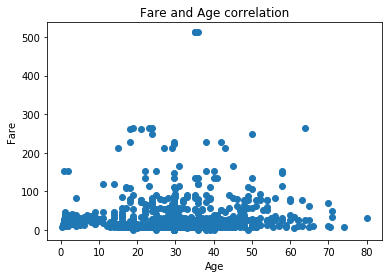

In [61]:
plt.scatter(data['Age'],data['Fare'])
plt.title('Fare and Age correlation')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

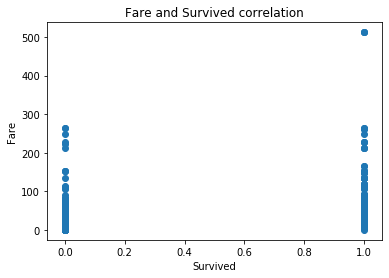

0.2552904613046994


In [62]:
plt.scatter(data['Survived'],data['Fare'])
plt.title('Fare and Survived correlation')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()
print(np.corrcoef(data['Survived'], data['Fare'])[0,1])

Корреляция между выживаемостью и ценой билета достаточно высока, чтобы говорить о зависсимости между данными признаками

In [63]:
print(np.corrcoef(data['Survived'], data['Pclass'])[0,1])

-0.3355488593568253


Корреляция между классом и выживаемостью еще выше! Видимо, первыми спасали всё-таки богатых.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [64]:
data['Relatives'] = data['Parch'] + data['SibSp']

In [65]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
5,0,3,male,29.699118,0,0,8.4583,Q,0
6,0,1,male,54.000000,0,0,51.8625,S,0
7,0,3,male,2.000000,3,1,21.0750,S,4
8,1,3,female,27.000000,0,2,11.1333,S,2
9,1,2,female,14.000000,1,0,30.0708,C,1


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

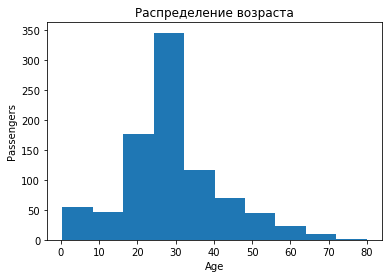

In [66]:
plt.hist(data['Age'])
plt.title('Распределение возраста')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.show()

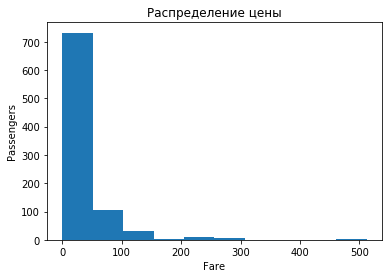

In [67]:
plt.hist(data['Fare'])
plt.title('Распределение цены')
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.show()

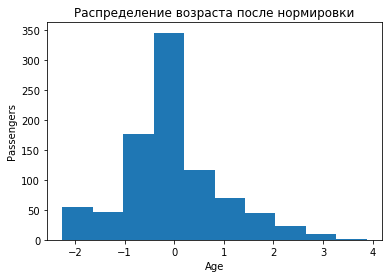

In [68]:
plt.hist((data['Age'] - data['Age'].mean())/data['Age'].std())
plt.title('Распределение возраста после нормировки')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.show()

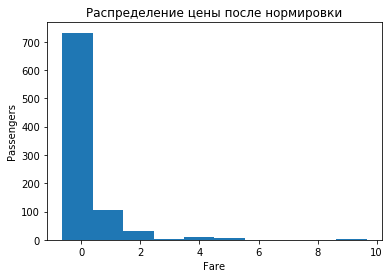

In [69]:
plt.hist((data['Fare'] - data['Fare'].mean())/data['Fare'].std())
plt.title('Распределение цены после нормировки')
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.show()

Слишком большой разброс между признаками будет сильно сказываться при вычислении расстояние между объектами или при обучении линейной регрессии градиентным спуском. Если мы приведем наш признак к нормалььному распределению с ожиданием 0 и дисперсией 1 мы сохраним основную информацию о выборке, но разброс будет лежать в меньших границах.

Хотя при KNN нам выгодно, когда расстояние между объектами разных классов большое, так что тут у меня иногда возникают вопросы.

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [70]:
data = pd.get_dummies(data,prefix = "", prefix_sep='', columns=['Sex'])
data = pd.get_dummies(data,prefix = "", prefix_sep='', columns=['Embarked'])

In [71]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Посмотреть, на что влияет признак 'Embarked' и какие выводы можно сделать по этому признаку.

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Relatives',
       'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

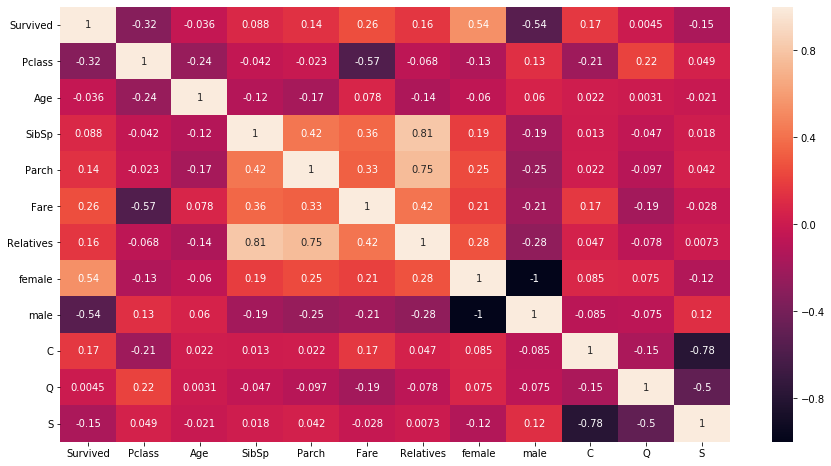

In [72]:
import seaborn as sns
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

Заметим, что корреляция между выживаемостью людей с метами S и C имеет место и равна -0.15 и 0.17 соответственно. Интересно, как влияет то, где человек сел на корабль и то, почему он вижил или нет? 

Заметим, что есть корреляция между C и ценой билета. Напрашивается вопрос, что это за зависсимость?

In [73]:
print(data['Fare'].loc[data['C'] == 1].mean())
print(data['Fare'].mean())

59.95414404761905
32.09668087739029


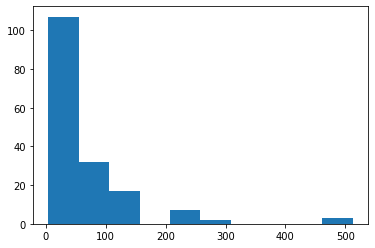

In [74]:
plt.hist(data['Fare'].loc[data['C'] == 1])
plt.show()

Ага, получается, что в городе C садились на корабль более богатые люди, средняя цена билета очень отличается! Такой вывод можно было сделать и раньше по корреляции между C и Pclass

Обратная ситуация с признаком Q, про признак S мне не удалось достать чего-то более информативного

В целом, мы можем перечислить те признаки, которые наиболее важные для целевой переменной: пол пассажира, стоимость места, колличество родственников, класс в котором едет пассажир и тот факт, где он сел на корабль.

# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [75]:
from sklearn.base import BaseEstimator
from sklearn.neighbors import KDTree

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors = 5):
        super().__init__()
        self.neighbors = n_neighbors
        self.data = None
        self.target = None
        self.search_tree = None
    
    def fit(self, X, y):
        self.data = X
        self.target = y
        self.search_tree = KDTree(X)
    
    def predict(self, X):
        objects = self.search_tree.query(X, k = self.neighbors)[1]
        result = []
        for answer in objects:
            indexes = []
            for neighbor in answer:
                indexes.append(y.iloc[neighbor])
            points = dict()
            for answer in indexes:
                if points.get(answer) is None:
                    points[answer] = 1
                else:
                    points[answer] += 1
            result.append(max(points, key=points.get))
        return result
            
    
    def predict_proba(self, X):
        objects = self.search_tree.query(X, k = self.neighbors)[1]
        result = []
        for answer in objects:
            indexes = []
            for neighbor in answer:
                indexes.append(y.iloc[neighbor])
            points = dict()
            for answer in indexes:
                if points.get(answer) is None:
                    points[answer] = 1
                else:
                    points[answer] += 1
            for key in points.keys():
                points[key] = points[key]/float(self.neighbors)
            result.append(points)
        return result

In [76]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [77]:
X = data.drop(['Survived'],axis = 1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Relatives,female,male,C,Q,S
0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [79]:
model = MyNeighborsClassifier()
model.fit(X_train,y_train)

In [80]:
from sklearn.metrics import accuracy_score

In [92]:
results = []
for k in range(1,100):
    model = MyNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    results.append(accuracy_score(model.predict(X_test), y_test))
print(max(results))
for i in range (len(results)):
    if max(results) == results[i]:
        print(i)

0.6404494382022472
78
94
97


In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
results = []
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    results.append(accuracy_score(model.predict(X_test), y_test))
print(max(results))

0.7584269662921348


In [84]:
model = MyNeighborsClassifier()
model.fit(X_train,y_train)

In [85]:
model.predict_proba(X_test)

[{0: 0.8, 1: 0.2},
 {0: 0.6, 1: 0.4},
 {0: 0.4, 1: 0.6},
 {1: 0.4, 0: 0.6},
 {0: 1.0},
 {0: 0.8, 1: 0.2},
 {0: 0.8, 1: 0.2},
 {1: 0.6, 0: 0.4},
 {0: 0.8, 1: 0.2},
 {1: 0.2, 0: 0.8},
 {1: 0.6, 0: 0.4},
 {1: 0.6, 0: 0.4},
 {0: 0.8, 1: 0.2},
 {1: 0.2, 0: 0.8},
 {0: 0.6, 1: 0.4},
 {1: 0.8, 0: 0.2},
 {1: 0.6, 0: 0.4},
 {0: 0.6, 1: 0.4},
 {0: 0.8, 1: 0.2},
 {1: 0.2, 0: 0.8},
 {1: 0.4, 0: 0.6},
 {1: 0.8, 0: 0.2},
 {1: 0.4, 0: 0.6},
 {1: 0.6, 0: 0.4},
 {1: 0.6, 0: 0.4},
 {1: 0.2, 0: 0.8},
 {0: 0.4, 1: 0.6},
 {0: 0.8, 1: 0.2},
 {1: 1.0},
 {0: 1.0},
 {0: 0.6, 1: 0.4},
 {0: 0.6, 1: 0.4},
 {0: 0.8, 1: 0.2},
 {0: 0.6, 1: 0.4},
 {0: 1.0},
 {0: 0.4, 1: 0.6},
 {0: 0.8, 1: 0.2},
 {1: 0.4, 0: 0.6},
 {0: 1.0},
 {1: 0.6, 0: 0.4},
 {1: 0.6, 0: 0.4},
 {0: 0.2, 1: 0.8},
 {1: 0.6, 0: 0.4},
 {1: 0.6, 0: 0.4},
 {0: 0.6, 1: 0.4},
 {1: 0.6, 0: 0.4},
 {1: 0.4, 0: 0.6},
 {1: 0.6, 0: 0.4},
 {0: 1.0},
 {0: 0.6, 1: 0.4},
 {0: 0.4, 1: 0.6},
 {0: 1.0},
 {0: 0.8, 1: 0.2},
 {0: 0.6, 1: 0.4},
 {1: 0.8, 0: 0.2},
 {0: 0.6, 1